In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
# Drop the 'Sex' column from the dataset
abalone_data_no_sex = df.drop(columns=['Sex'])

# Display the first few rows of the updated dataset
abalone_data_no_sex.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


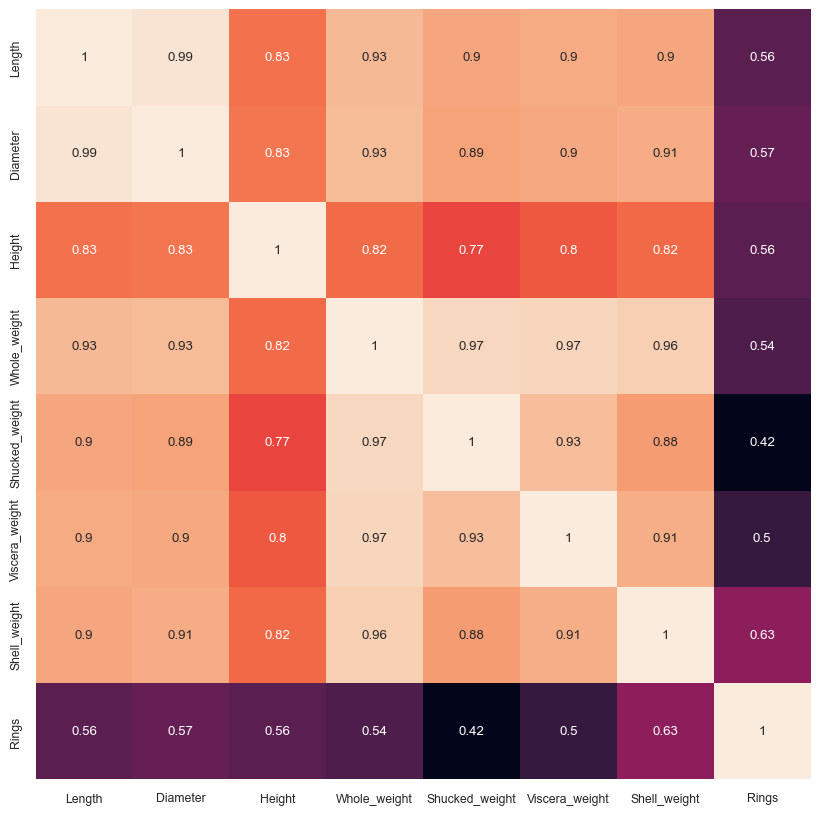

In [4]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr = abalone_data_no_sex.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X = abalone_data_no_sex.drop('Rings', axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [7]:
y = abalone_data_no_sex['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# 원-핫 인코딩

In [8]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 Numpy로 변환

In [9]:
X=X.values

In [10]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [11]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 7), (3341, 28), (836, 7), (836, 28))

In [14]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

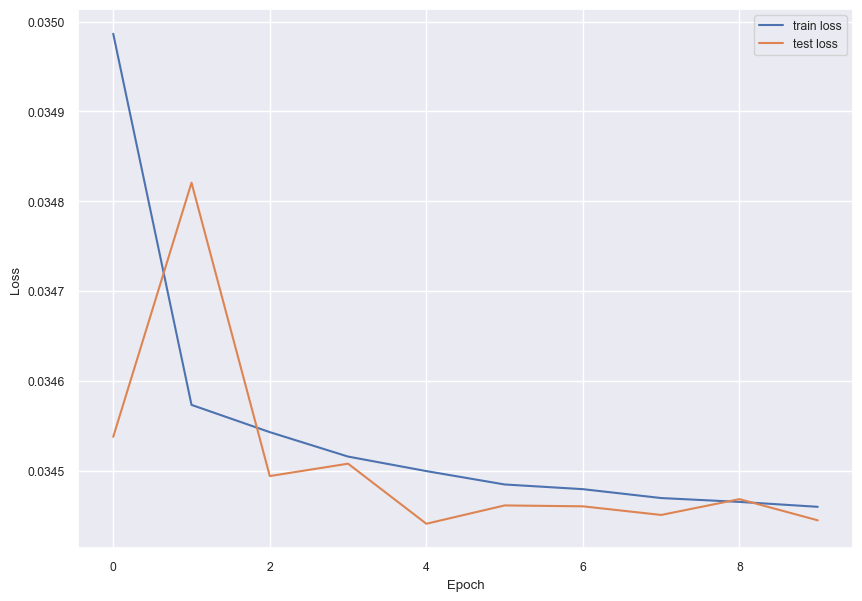

In [16]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 0.0344


[0.03444492816925049, 0.03444492816925049]